In [143]:
%matplotlib inline

Epoch [10/50], Loss: 36.0568
Epoch [20/50], Loss: 10.7776
Epoch [30/50], Loss: 3.3790
Epoch [40/50], Loss: 1.2093
Epoch [50/50], Loss: 0.5718


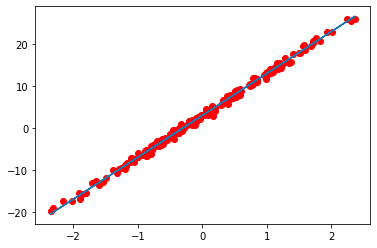

In [294]:
import torch
import numpy as np
import matplotlib.pyplot as plt

input_size = 1
output_size = 1
batch_size = 200
num_epochs = 50
log_time = num_epochs / 5
learning_rate = 0.03

x_train = torch.randn(batch_size, input_size)
w_train = torch.tensor([10.])
b_train = torch.tensor([3.])
y_train = w_train * x_train + b_train + torch.randn(x_train.shape) * 0.5

w_model = torch.randn(w_train.shape, requires_grad=True)
b_model = torch.randn(b_train.shape, requires_grad=True)

for epoch in range(1, num_epochs + 1):
    prediction = w_model * x_train + b_model
    loss = ((y_train - prediction) ** 2).mean()
    loss.backward()
    
    with torch.no_grad():
        w_model -= learning_rate * w_model.grad
        b_model -= learning_rate * b_model.grad
        w_model.grad.zero_()
        b_model.grad.zero_()
    
    if epoch % log_time == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch, num_epochs, loss.item()))

prediction = w_train * x_train + b_train
plt.plot(x_train, y_train, 'ro')
plt.plot(x_train, prediction)
plt.show()

Epoch [10/50], Loss: 39.3608
Epoch [20/50], Loss: 11.5504
Epoch [30/50], Loss: 3.5749
Epoch [40/50], Loss: 1.2480
Epoch [50/50], Loss: 0.5585


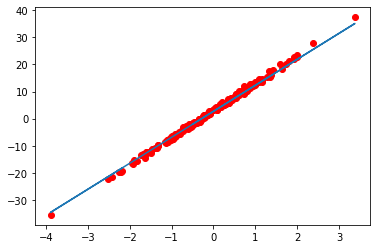

In [295]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

input_size = 1
output_size = 1
batch_size = 200
num_epochs = 50
log_time = epochs / 5
learning_rate = 0.03

x_train = torch.randn(batch_size, input_size)
w_train = torch.tensor([10.])
b_train = torch.tensor([3.])
y_train = w_train * x_train + b_train + torch.randn(x_train.shape) * 0.5

model = nn.Linear(input_size, output_size)

for epoch in range(1, num_epochs + 1):
    prediction = model(x_train)
    loss = ((y_train - prediction) ** 2).mean()
    loss.backward()
    
    with torch.no_grad():
        model.weight -= learning_rate * model.weight.grad
        model.bias -= learning_rate * model.bias.grad
        model.weight.grad.zero_()
        model.bias.grad.zero_()
    
    if epoch % log_time == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch, num_epochs, loss.item()))

prediction = model(x_train).detach().numpy()
plt.plot(x_train, y_train, 'ro')
plt.plot(x_train, prediction)
plt.show()

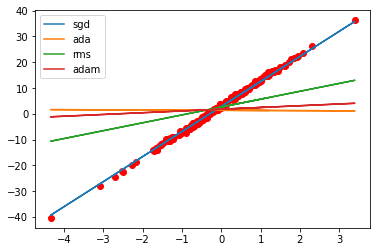

In [296]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

input_size = 1
output_size = 1
batch_size = 200
num_epochs = 50
learning_rate = 0.03

x_train = torch.randn(batch_size, input_size)
w_train = torch.tensor([10.])
b_train = torch.tensor([3.])
y_train = w_train * x_train + b_train + torch.randn(x_train.shape) * 0.5

model_sgd = nn.Linear(input_size, output_size)
model_ada = nn.Linear(input_size, output_size)
model_rms = nn.Linear(input_size, output_size)
model_adam = nn.Linear(input_size, output_size)

sgd = torch.optim.SGD(model_sgd.parameters(), lr=learning_rate)
ada = torch.optim.Adagrad(model_ada.parameters(), lr=learning_rate)
rms = torch.optim.RMSprop(model_rms.parameters(), lr=learning_rate)
adam = torch.optim.Adam(model_adam.parameters(), lr=learning_rate)

for epoch in range(1, num_epochs + 1):
    prediction_sgd = model_sgd(x_train)
    prediction_ada = model_ada(x_train)
    prediction_rms = model_rms(x_train)
    prediction_adam = model_adam(x_train)
    
    loss_sgd = ((y_train - prediction_sgd) ** 2).mean()
    loss_ada = ((y_train - prediction_ada) ** 2).mean()
    loss_rms = ((y_train - prediction_rms) ** 2).mean()
    loss_adam = ((y_train - prediction_adam) ** 2).mean()
    
    loss_sgd.backward()
    loss_ada.backward()
    loss_rms.backward()
    loss_adam.backward()
    
    sgd.step()
    ada.step()
    rms.step()
    adam.step()
    
    sgd.zero_grad()
    ada.zero_grad()
    rms.zero_grad()
    adam.zero_grad()

prediction_sgd = model_sgd(x_train).detach().numpy()
prediction_ada = model_ada(x_train).detach().numpy()
prediction_rms = model_rms(x_train).detach().numpy()
prediction_adam = model_adam(x_train).detach().numpy()

plt.plot(x_train, y_train, 'ro')
plt.plot(x_train, prediction_sgd, label='sgd')
plt.plot(x_train, prediction_ada, label='ada')
plt.plot(x_train, prediction_rms, label='rms')
plt.plot(x_train, prediction_adam, label='adam')
plt.legend()
plt.show()

Epoch [1/5000], Loss: 0.4236
Epoch [5000/5000], Loss: 0.2053


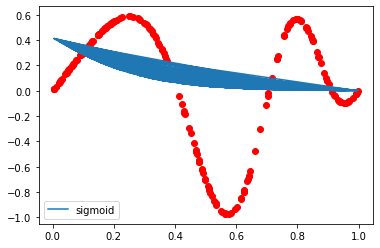

Epoch [1/5000], Loss: 0.1975
Epoch [5000/5000], Loss: 0.1899


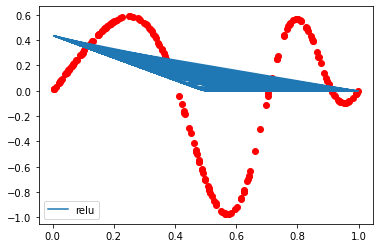

Epoch [1/5000], Loss: 0.2786
Epoch [5000/5000], Loss: 0.2132


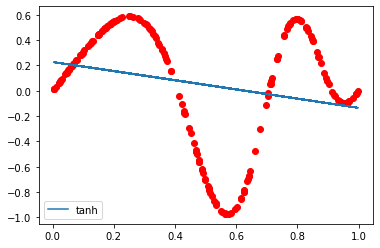

In [324]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

input_size = 1
output_size = 1
batch_size = 200
num_epochs = 5000
learning_rate = 0.03

x_train = torch.rand(batch_size, input_size)
y_train = torch.sin(np.pi * x_train) * torch.cos(3 * np.pi * x_train ** 2)

class Model(nn.Module):
    def __init__(self, activation):
        super(Model, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        if activation == 'sigmoid':
            return torch.sigmoid(self.linear(x))
        elif activation == 'relu':
            return torch.relu(self.linear(x))
        return torch.tanh(self.linear(x))

for activation in ['sigmoid', 'relu', 'tanh']:
    model = Model(activation)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(1, num_epochs + 1):
        prediction = model(x_train)
        loss = ((y_train - prediction) ** 2).mean()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch == 1:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch, num_epochs, loss.item()))
        if epoch == num_epochs:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch, num_epochs, loss.item()))

    prediction = model(x_train).detach().numpy()
    plt.plot(x_train, y_train, 'ro')
    plt.plot(x_train, prediction, label=activation)
    plt.legend(loc='lower left')
    plt.show()

Epoch [10/50], Loss: 0.4122
Epoch [20/50], Loss: 0.3465
Epoch [30/50], Loss: 0.2971
Epoch [40/50], Loss: 0.2664
Epoch [50/50], Loss: 0.2506


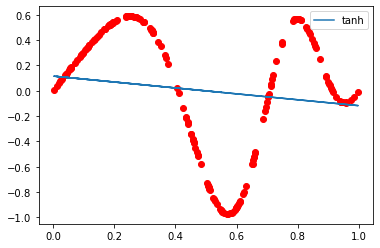

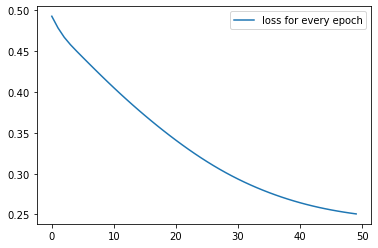

In [347]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

input_size = 1
output_size = 1
batch_size = 200
num_epochs = 50
log_time = num_epochs / 5
learning_rate = 0.03

x_train = torch.rand(batch_size, input_size)
y_train = torch.sin(np.pi * x_train) * torch.cos(3 * np.pi * x_train ** 2)

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        return torch.tanh(self.linear(x))

model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_dict = []

for epoch in range(1, num_epochs + 1):
    prediction = model(x_train)
    loss = criterion(prediction, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_dict.append(loss.item())
    if epoch % log_time == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch, num_epochs, loss.item()))

prediction = model(x_train).detach().numpy()
plt.plot(x_train, y_train, 'ro')
plt.plot(x_train, prediction, label='tanh')
plt.legend()
plt.show()

plt.plot(loss_dict, label='loss for every epoch')
plt.legend()
plt.show()

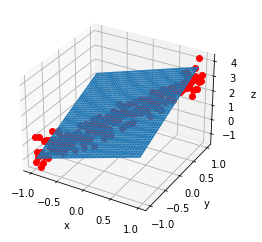

In [407]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader
from mpl_toolkits.mplot3d import Axes3D

input_size = 2
output_size = 1
batch_size = 200
num_epochs = 5000
learning_rate = 0.03

class TrainData(Dataset):
    def __init__(self):
        self.x = torch.zeros(batch_size, input_size)
        self.x[:,0] = torch.arange(-1, 1, 0.01)
        self.x[:,1] = torch.arange(-1, 1, 0.01)
        
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b
        
        self.y = self.f + torch.randn((self.x.shape[0], 1)) * 0.5
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

train_data = TrainData()

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        return torch.tanh(self.linear(x))

model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=train_data, batch_size=batch_size)

for epoch in range(num_epochs):
    for x_train, y_train in train_loader:
        prediction = model(x_train)
        loss = criterion(prediction, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

w1 = model.state_dict()['linear.weight'].numpy()[0][0]
w2 = model.state_dict()['linear.weight'].numpy()[0][1]
b = model.state_dict()['linear.bias'].numpy()

x1 = train_data.x[:,0].view(-1, 1).numpy()
x2 = train_data.x[:,1].view(-1, 1).numpy()
y = train_data.y.numpy()

X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))

prediction = w1 * X + w2 * Y + b
ax = plt.axes(projection='3d')
ax.plot(x1[:,0], x2[:,0], y[:,0], 'ro')
ax.plot_surface(X, Y, prediction)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

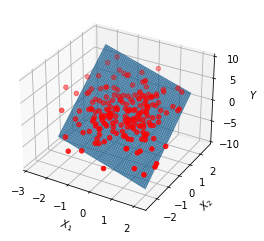

In [428]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

input_size = 2
output_size = 1
batch_size = 200
num_epochs = 5000
learning_rate = 0.03

x_train = torch.randn(batch_size, input_size)
w_train = torch.tensor([[-1.0], [2.0]])
y_train = x_train.mm(w_train) + torch.randn(batch_size, 1) * 0.1

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.weight = self.linear.weight
    def forward(self, x):
        return torch.tanh(self.linear(x))

model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    prediction = model(x_train)
    loss = criterion(prediction, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

x1, x2 = np.meshgrid(np.linspace(-2, 2, batch_size), np.linspace(-2, 2, batch_size))
x_plane = torch.tensor(np.stack([np.reshape(x1, (batch_size ** 2)), np.reshape(x2, (batch_size ** 2))], axis=1)).float()
y_plane = np.reshape((x_plane.mm(model.weight.t())).detach().numpy(), (batch_size, batch_size))

ax = plt.subplot(111, projection='3d')
ax.scatter(x_train[:,0].numpy(), x_train[:,1].numpy(), y_train.numpy(), c='r', marker='o')
ax.plot_surface(x1, x2, y_plane, alpha=0.8)
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$Y$')
plt.show()

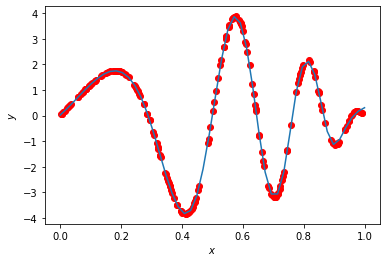

In [440]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

input_size = 1
output_size = 1
batch_size = 200
num_neurons = 32
num_epochs = 5000
learning_rate = 0.03
momentum = 0.9

x_train = torch.rand(batch_size, input_size)
y_train = 4 * torch.sin(np.pi * x_train) * torch.cos(6 * np.pi * x_train ** 2)

model = nn.Sequential(
                    nn.Linear(input_size, num_neurons), 
                    nn.Tanh(),
                    nn.Linear(num_neurons, num_neurons),
                    nn.Tanh(),
                    nn.Linear(num_neurons, output_size))
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

for epoch in range(num_epochs):
    prediction = model(x_train)
    loss = criterion(prediction, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

x_test = torch.from_numpy(np.linspace(0, 1, 50)).float().view(-1, input_size)
prediction = model(x_test)
plt.plot(x_train, y_train, 'ro')
plt.plot(x_test.detach().numpy(), prediction.detach().numpy())
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

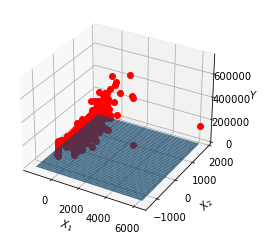

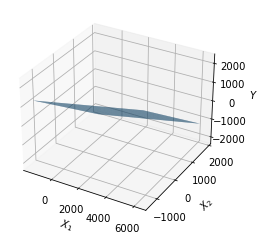

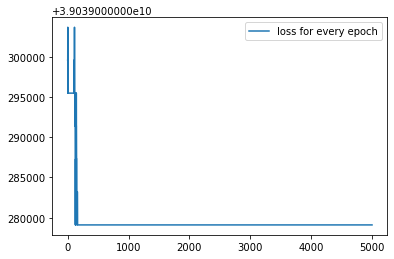

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition

input_size = 2
output_size = 1
batch_size = 1460
num_epochs = 5000
learning_rate = 0.03

df = pd.read_csv('./data_houses.csv')
pca = decomposition.PCA(n_components=2)
x_train = pca.fit_transform(df[['OverallQual', 'GrLivArea', 'TotalBsmtSF', "GarageCars"]].values)
y_train = df['SalePrice'].values

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.weight = self.linear.weight
    def forward(self, x):
        return torch.tanh(self.linear(x))

model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_dict = []

for epoch in range(num_epochs):
    prediction = model(torch.from_numpy(x_train).float())
    loss = criterion(prediction, torch.from_numpy(y_train).float().unsqueeze(-1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_dict.append(loss.item())

x1, x2 = np.meshgrid(np.linspace(x_train[:,0].min(), x_train[:,0].max(), batch_size),
                     np.linspace(x_train[:,1].min(), x_train[:,1].max(), batch_size))
x_plane = torch.tensor(np.stack([np.reshape(x1, (batch_size ** 2)), np.reshape(x2, (batch_size ** 2))], axis=1)).float()
y_plane = np.reshape((x_plane.mm(model.weight.t())).detach().numpy(), (batch_size, batch_size))

ax = plt.subplot(111, projection='3d')
ax.plot(x_train[:,0], x_train[:,1], y_train, 'ro')
ax.plot_surface(x1, x2, y_plane, alpha=0.8)
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$Y$')
plt.show()

ax = plt.subplot(111, projection='3d')
ax.plot_surface(x1, x2, y_plane, alpha=0.8)
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$Y$')
plt.show()

plt.plot(loss_dict, label='loss for every epoch')
plt.legend()
plt.show()

df.head()